Importing required libraries

In [3]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle



Read the data from the csv file and finding the mode of the below data

In [4]:
df = pd.read_csv("penguins.csv")
print(df.describe())
frequent_species = df.species.value_counts().index[0]
df['species'] = df['species'].fillna(frequent_species)

frequent_island = df.island.value_counts().index[0]
df['island'] = df['island'].fillna(frequent_island)

frequent_gender = df.gender.value_counts().index[0]
df['gender'] = df['gender'].fillna(frequent_gender)

#print(df)

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

Adding mean to the missing numeric data

In [5]:
df['calorie requirement'] = df['calorie requirement'].fillna(df['calorie requirement'].mean())
df['average sleep duration'] = df['average sleep duration'].fillna(df['average sleep duration'].mean())
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
#df = df.fillna(df.mean(axis = 0))
print(df)

       species     island  calorie requirement  average sleep duration  \
0       Adelie  Torgersen                 6563                      11   
1       Adelie  Torgersen                 4890                      14   
2       Adelie  Torgersen                 7184                      11   
3       Adelie  Torgersen                 4169                       8   
4       Adelie  Torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  Chinstrap      Dream                 4826                      11   
340  Chinstrap      Dream                 4111                       9   
341  Chinstrap      Dream                 7049                      10   
342  Chinstrap      Dream                 4705                       7   
343  Chinstrap      Dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0         39.100000      18.70000

Extracting the numerical values and printing the mean, median, mode and standard deviaitoin of the data

In [6]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df)
# Calculate mean,median,sd for each numeric column
means = numeric_df.mean()
medians = numeric_df.median()
sds = numeric_df.std()
print('mean',means)
print('median',medians)
print('standard deviation\n',sds)
print("\n mode : \n",df.mode(axis=0))

     calorie requirement  average sleep duration  bill_length_mm  \
0                   6563                      11       39.100000   
1                   4890                      14       39.500000   
2                   7184                      11       40.300000   
3                   4169                       8       45.494214   
4                   4774                       8       36.700000   
..                   ...                     ...             ...   
339                 4826                      11       55.800000   
340                 4111                       9       43.500000   
341                 7049                      10       49.600000   
342                 4705                       7       50.800000   
343                 6098                       7       50.200000   

     bill_depth_mm  flipper_length_mm  body_mass_g    year  
0        18.700000         181.000000       3750.0  2007.0  
1        17.400000         186.000000       3800.0  2007.0  


Handling the mismatched string values by converting all the values into lowercase

In [7]:
df['species'] = df['species'].str.lower()
df['island'] = df['island'].str.lower()
df['gender'] = df['gender'].str.lower()
print(df)

       species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen                 6563                      11   
1       adelie  torgersen                 4890                      14   
2       adelie  torgersen                 7184                      11   
3       adelie  torgersen                 4169                       8   
4       adelie  torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  chinstrap      dream                 4826                      11   
340  chinstrap      dream                 4111                       9   
341  chinstrap      dream                 7049                      10   
342  chinstrap      dream                 4705                       7   
343  chinstrap      dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0         39.100000      18.70000

Creating a boxplot to analyse the outliers

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

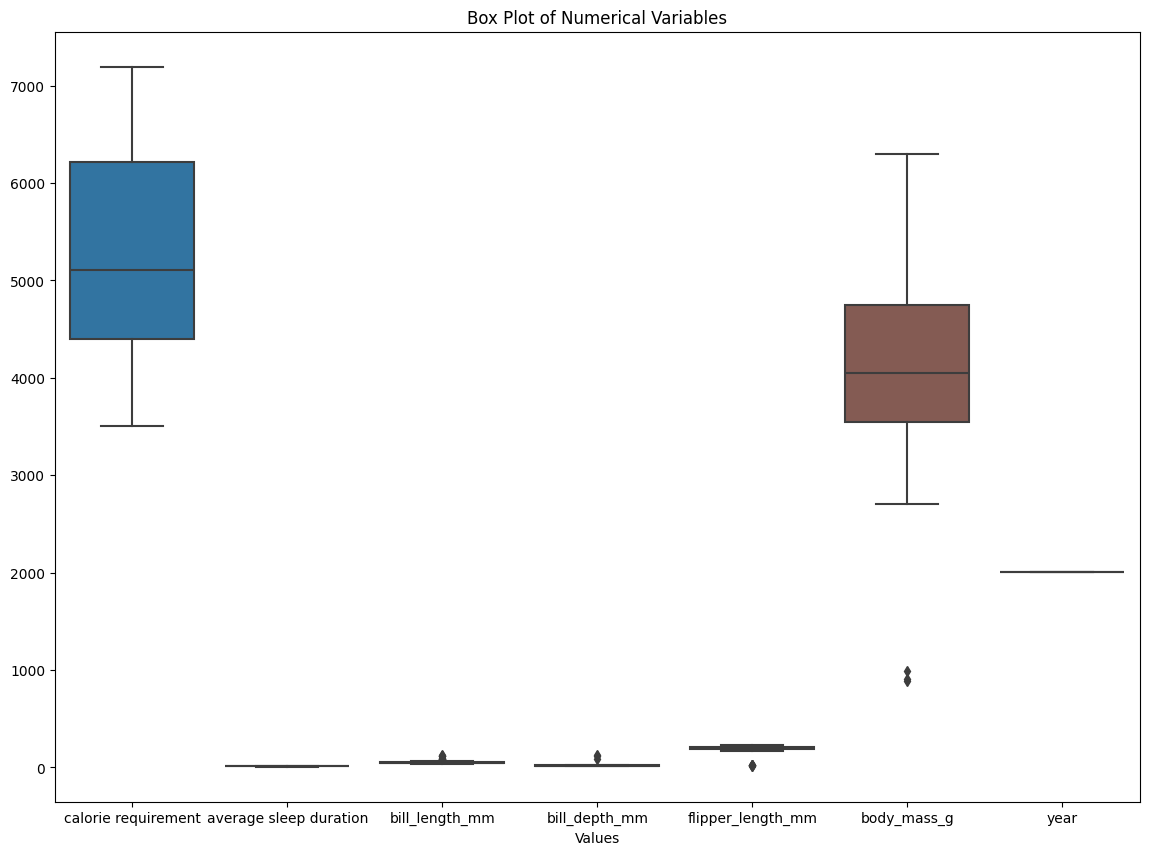

In [8]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=df)

# Customize plot labels and title

plt.xlabel("Values")
plt.title("Box Plot of Numerical Variables")

# Display the plot inline in Jupyter Notebook

plt.show()


Finding the outliers which lies outside of 15. times of interquartile range using find_quartile() method
Then replaced the outliers with medians

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(medians['calorie requirement'])
print(numeric_df)

def find_quartile (val):
    Q1 = numeric_df[val].quantile(0.25)
    Q3 = numeric_df[val].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    return Q1,Q3,IQR,threshold;


Q1,Q3,IQR,threshold = find_quartile('calorie requirement')
numeric_df['calorie requirement'] = numeric_df['calorie requirement'].apply(lambda x: medians['calorie requirement'] if (x < Q1 - threshold) | (x > Q3 + threshold) else x)

Q1,Q3,IQR,threshold = find_quartile('average sleep duration')
numeric_df['average sleep duration'] = numeric_df['average sleep duration'].apply(lambda x: medians['average sleep duration'] if (x < Q1 - threshold) | (x > Q3 + threshold) else x)

Q1,Q3,IQR,threshold = find_quartile('bill_length_mm')
numeric_df['bill_length_mm'] = numeric_df['bill_length_mm'].apply(lambda x: medians['bill_length_mm'] if (x < Q1 - threshold) | (x > Q3 + threshold) else x)

Q1,Q3,IQR,threshold = find_quartile('bill_depth_mm')
numeric_df['bill_depth_mm'] = numeric_df['bill_depth_mm'].apply(lambda x: medians['bill_depth_mm'] if (x < Q1 - threshold) | (x > Q3 + threshold) else x)

Q1,Q3,IQR,threshold = find_quartile('flipper_length_mm')
numeric_df['flipper_length_mm'] = numeric_df['flipper_length_mm'].apply(lambda x: medians['flipper_length_mm'] if (x < Q1 - threshold) | (x > Q3 + threshold) else x)

Q1,Q3,IQR,threshold = find_quartile('body_mass_g')
numeric_df['body_mass_g'] = numeric_df['body_mass_g'].apply(lambda x: medians['body_mass_g'] if (x < Q1 - threshold) | (x > Q3 + threshold) else x)

Q1,Q3,IQR,threshold = find_quartile('year')
numeric_df['year'] = numeric_df['year'].apply(lambda x: medians['year'] if (x < Q1 - threshold) | (x > Q3 + threshold) else x)




df['calorie requirement'] = numeric_df['calorie requirement']
df['average sleep duration'] = numeric_df['average sleep duration']
df['bill_length_mm'] = numeric_df['bill_length_mm']
df['bill_depth_mm'] = numeric_df['bill_depth_mm']
df['flipper_length_mm'] = numeric_df['flipper_length_mm']
df['body_mass_g'] = numeric_df['body_mass_g']
df['year'] = numeric_df['year']

print(numeric_df)
print(df)


5106.5
     calorie requirement  average sleep duration  bill_length_mm  \
0                   6563                      11       39.100000   
1                   4890                      14       39.500000   
2                   7184                      11       40.300000   
3                   4169                       8       45.494214   
4                   4774                       8       36.700000   
..                   ...                     ...             ...   
339                 4826                      11       55.800000   
340                 4111                       9       43.500000   
341                 7049                      10       49.600000   
342                 4705                       7       50.800000   
343                 6098                       7       50.200000   

     bill_depth_mm  flipper_length_mm  body_mass_g    year  
0        18.700000         181.000000       3750.0  2007.0  
1        17.400000         186.000000       3800.0  20

Creaing heatmap data visualization for correlation matrix where we found the correlation between the dataset

     calorie requirement  average sleep duration  bill_length_mm  \
0                   6563                      11       39.100000   
1                   4890                      14       39.500000   
2                   7184                      11       40.300000   
3                   4169                       8       45.494214   
4                   4774                       8       36.700000   
..                   ...                     ...             ...   
339                 4826                      11       55.800000   
340                 4111                       9       43.500000   
341                 7049                      10       49.600000   
342                 4705                       7       50.800000   
343                 6098                       7       50.200000   

     bill_depth_mm  flipper_length_mm  body_mass_g    year  
0        18.700000         181.000000       3750.0  2007.0  
1        17.400000         186.000000       3800.0  2007.0  


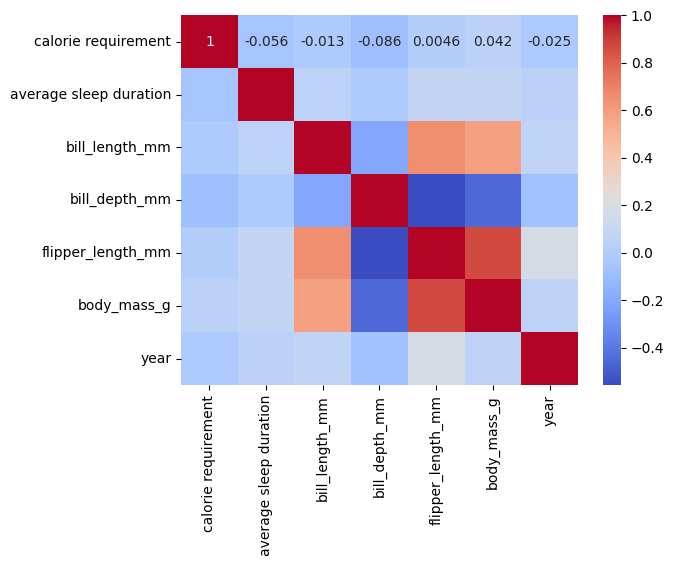

In [10]:
print(numeric_df)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Here we found that the data with the red and orange shades are more correlated
bill_length_mm , bill_depth_mm , flipper_length_mm , body_mass_g are highly corelated

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


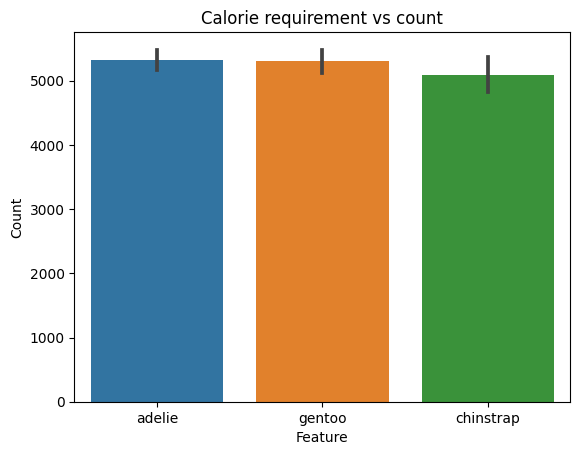

In [11]:
sns.barplot(x='species', y='calorie requirement', data=df)
plt.ylabel('Count')
plt.xlabel('Feature')
plt.title('Calorie requirement vs count')
plt.show()

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


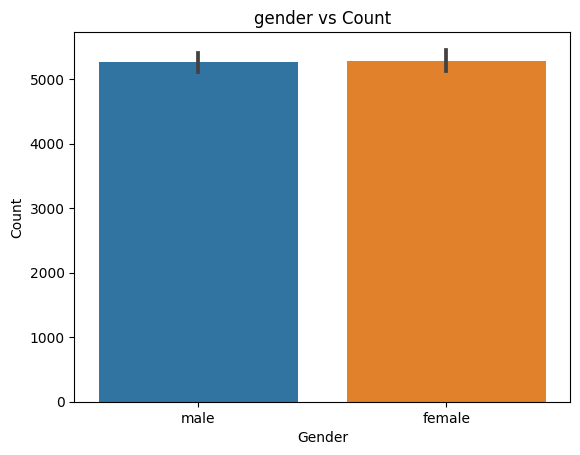

In [12]:
sns.barplot(x='gender', y='calorie requirement', data=df)
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('gender vs Count')
plt.show()

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


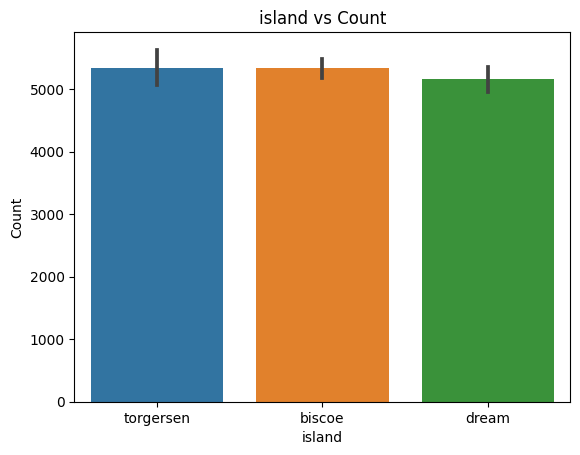

In [13]:
sns.barplot(x='island', y='calorie requirement', data=df)
plt.ylabel('Count')
plt.xlabel('island')
plt.title('island vs Count')
plt.show()

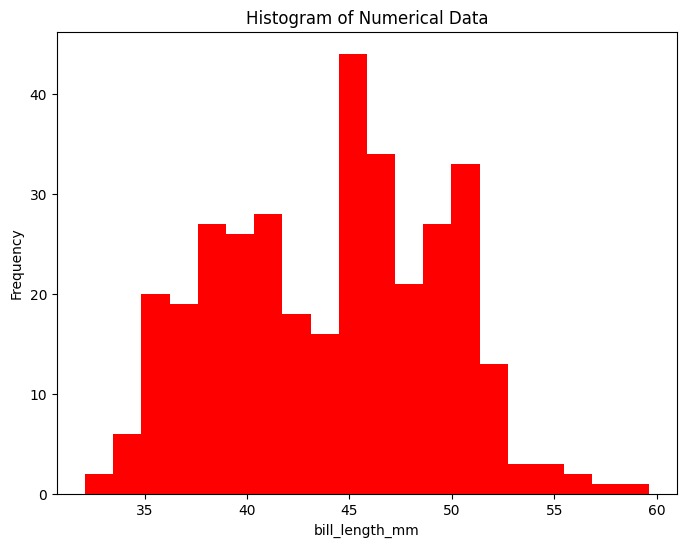

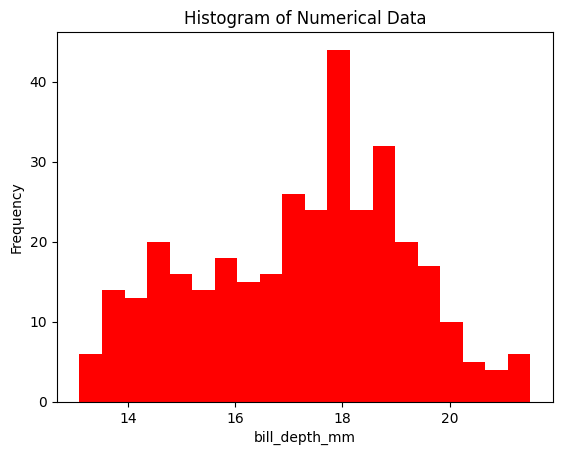

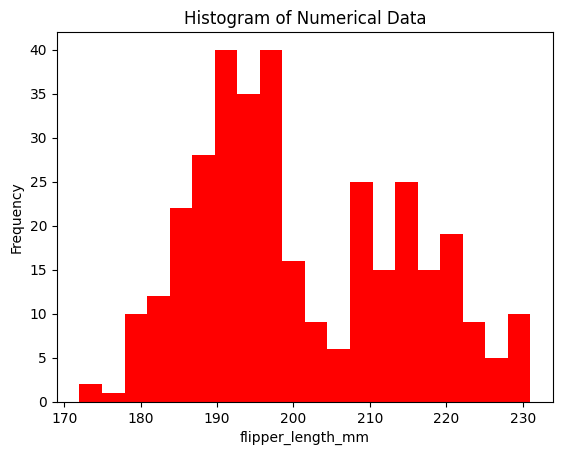

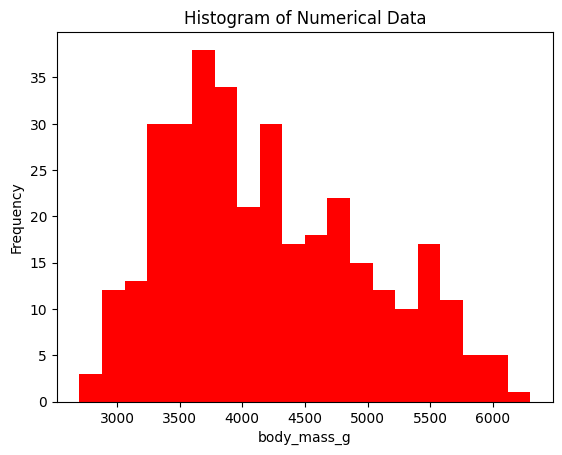

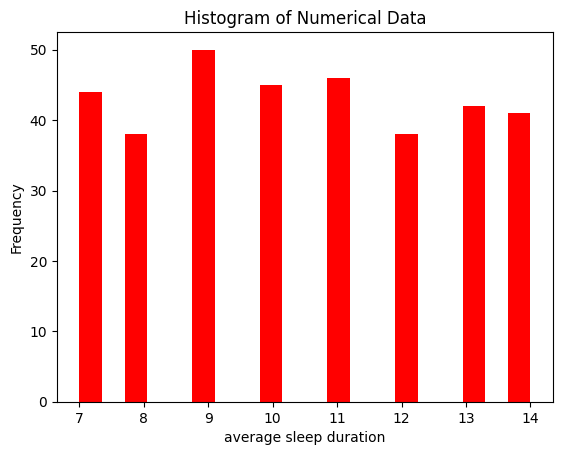

In [14]:
#histogram for continous variables

plt.figure(figsize=(8, 6))
plt.hist(df['bill_length_mm'], bins=20, color='red')  
plt.xlabel('bill_length_mm')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Data')
plt.show()

plt.hist(df['bill_depth_mm'], bins=20, color='red')  
plt.xlabel('bill_depth_mm')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Data')
plt.show()

plt.hist(df['flipper_length_mm'], bins=20, color='red') 
plt.xlabel('flipper_length_mm')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Data')
plt.show()

plt.hist(df['body_mass_g'], bins=20, color='red')  
plt.xlabel('body_mass_g')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Data')
plt.show()

plt.hist(df['average sleep duration'], bins=20, color='red')  
plt.xlabel('average sleep duration')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Data')
plt.show()

From the histogram its understood that 
Most of the penguins have bill length between 45 to 50 mm
Most of the penguins have flipper length between 190 to 200 mm
Most of the penguins have body mass between 3200 to 3800 g
Most of the penguind have sleep duration of 9 hrs

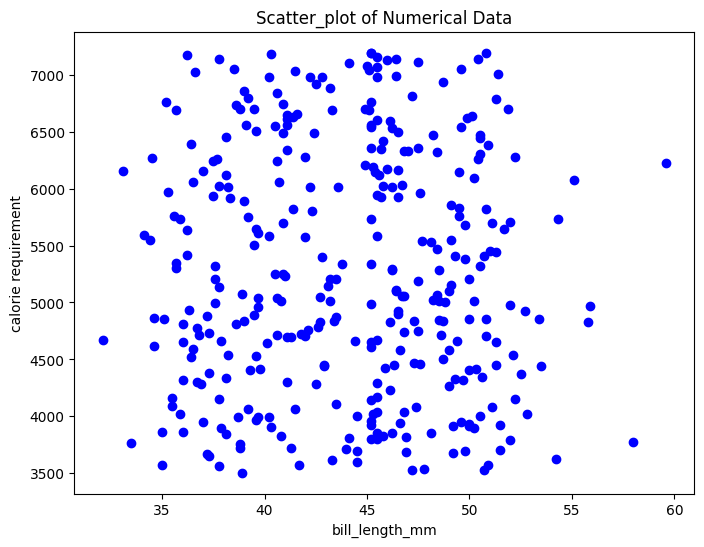

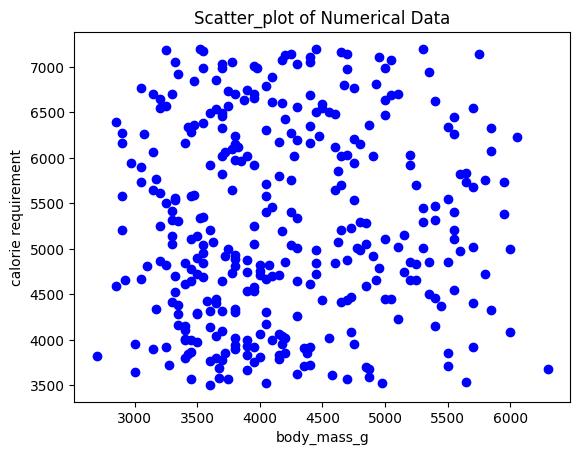

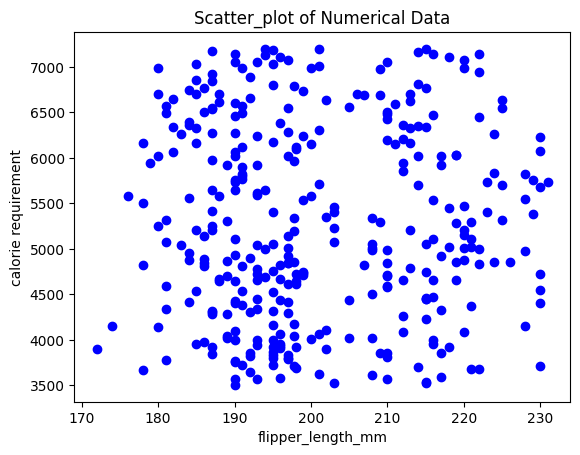

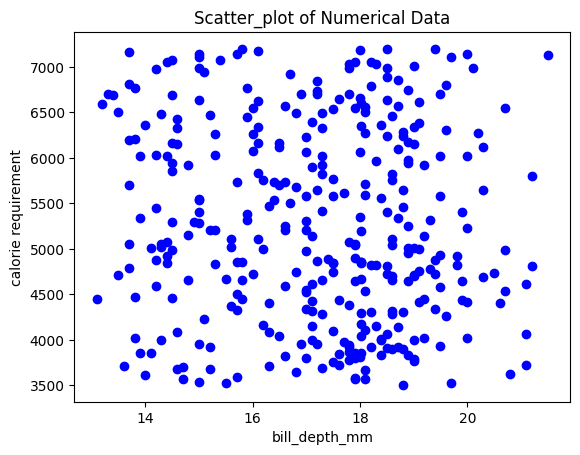

In [15]:
#scatterplot for continous variables

plt.figure(figsize=(8, 6))
plt.scatter(df['bill_length_mm'], df['calorie requirement'], color='blue') 
plt.xlabel('bill_length_mm')
plt.ylabel('calorie requirement')
plt.title('Scatter_plot of Numerical Data')
plt.show()

plt.scatter(df['body_mass_g'], df['calorie requirement'], color='blue') 
plt.xlabel('body_mass_g')
plt.ylabel('calorie requirement')
plt.title('Scatter_plot of Numerical Data')
plt.show()

plt.scatter(df['flipper_length_mm'], df['calorie requirement'], color='blue') 
plt.xlabel('flipper_length_mm')
plt.ylabel('calorie requirement')
plt.title('Scatter_plot of Numerical Data')
plt.show()

plt.scatter(df['bill_depth_mm'], df['calorie requirement'], color='blue') 
plt.xlabel('bill_depth_mm')
plt.ylabel('calorie requirement')
plt.title('Scatter_plot of Numerical Data')
plt.show()



#Here we can observe how the data is scattered and if it follows any pattern
From the scatter graph its understood that 
Most of the penguins have bill length between 45 to 50 mm
Most of the penguins have flipper length between 190 to 200 mm
Most of the penguins have body mass between 3200 to 3800 g
Most of the penguind have sleep duration of 9 hrs

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


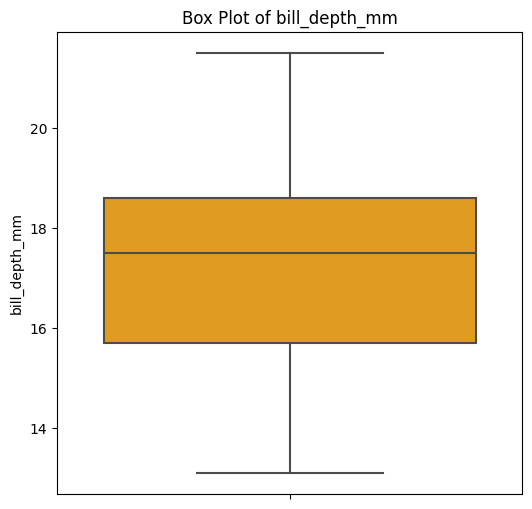

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


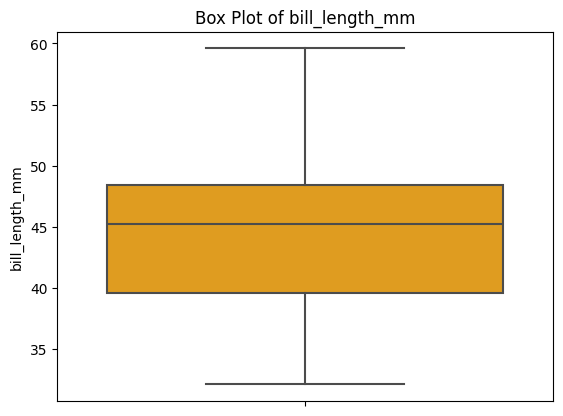

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


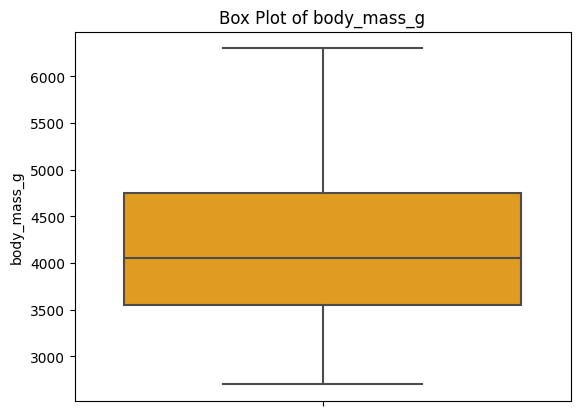

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


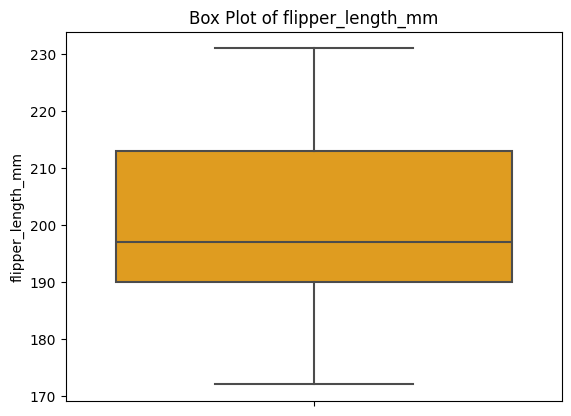

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, y='bill_depth_mm', color='orange')  
plt.ylabel('bill_depth_mm')
plt.title('Box Plot of bill_depth_mm')
plt.show()

sns.boxplot(data=df, y='bill_length_mm', color='orange')  
plt.ylabel('bill_length_mm')
plt.title('Box Plot of bill_length_mm')
plt.show()

sns.boxplot(data=df, y='body_mass_g', color='orange') 
plt.ylabel('body_mass_g')
plt.title('Box Plot of body_mass_g')
plt.show()

sns.boxplot(data=df, y='flipper_length_mm', color='orange') 
plt.ylabel('flipper_length_mm')
plt.title('Box Plot of flipper_length_mm')
plt.show()

#In box plot visualization we can view the Q1 and Q2 ranges and the interqurtile ranges to check for any outliers
From the boxplot we could have a prcise understanding
Most of the penguins have bill length between 38 to 48 mm
Most of the penguins have bill depth between 15.5 to 18.5 mm
Most of the penguins have body mass between 3500 to 4700 g
Most of the penguind have flipper length duration between 190 to 215 mm

#From the corelation matrix above I can see the related and unrelated columns

In [17]:
correlation_matrix = numeric_df.corr(method='spearman')
print(correlation_matrix.abs())

                        calorie requirement  average sleep duration  \
calorie requirement                1.000000                0.050963   
average sleep duration             0.050963                1.000000   
bill_length_mm                     0.016145                0.053610   
bill_depth_mm                      0.080991                0.015858   
flipper_length_mm                  0.010572                0.093484   
body_mass_g                        0.053042                0.073292   
year                               0.028604                0.039998   

                        bill_length_mm  bill_depth_mm  flipper_length_mm  \
calorie requirement           0.016145       0.080991           0.010572   
average sleep duration        0.053610       0.015858           0.093484   
bill_length_mm                1.000000       0.190048           0.669469   
bill_depth_mm                 0.190048       1.000000           0.497993   
flipper_length_mm             0.669469       0.4979

here we could see that the data of year and average sleep duration is almost the least as compared to other rows

In [18]:
np.sum(correlation_matrix.abs(),axis=1)

calorie requirement       1.240316
average sleep duration    1.327205
bill_length_mm            2.574245
bill_depth_mm             2.279845
flipper_length_mm         3.284556
body_mass_g               2.996481
year                      1.451777
dtype: float64

In [19]:
correlation_matrix = numeric_df.corr()
average_abs_corr = correlation_matrix.abs().mean()
print(average_abs_corr)
correlation_threshold = 0.25
uncorrelated_variables = average_abs_corr[average_abs_corr < correlation_threshold]
print("\n Un correlated variables\n",uncorrelated_variables)


calorie requirement       0.175033
average sleep duration    0.188317
bill_length_mm            0.366466
bill_depth_mm             0.340873
flipper_length_mm         0.475983
body_mass_g               0.439834
year                      0.203969
dtype: float64

 Un correlated variables
 calorie requirement       0.175033
average sleep duration    0.188317
year                      0.203969
dtype: float64


In [20]:
#Initially planned to have 'calorie requirement' as target, so didnt drop that column
#if 'calorie requirement' in uncorrelated_variables:
#    numeric_df_uncorr = uncorrelated_variables.drop('calorie requirement')
#print(type(numeric_df_uncorr))
numeric_df = numeric_df.drop(columns=uncorrelated_variables.index)
df = df.drop(columns=uncorrelated_variables.index)
print(df)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       adelie  torgersen       39.100000      18.700000         181.000000   
1       adelie  torgersen       39.500000      17.400000         186.000000   
2       adelie  torgersen       40.300000      18.000000         195.000000   
3       adelie  torgersen       45.494214      18.018318         197.764881   
4       adelie  torgersen       36.700000      19.300000         193.000000   
..         ...        ...             ...            ...                ...   
339  chinstrap      dream       55.800000      19.800000         207.000000   
340  chinstrap      dream       43.500000      18.100000         202.000000   
341  chinstrap      dream       49.600000      18.200000         193.000000   
342  chinstrap      dream       50.800000      19.000000         210.000000   
343  chinstrap      dream       50.200000      18.700000         198.000000   

     body_mass_g  gender  
0         3750.0    male

In [21]:
#Label encoding for categorical data

df['species'] = df['species'].astype('category')
df['species'] = pd.Categorical(df.species).codes

df['island'] = df['island'].astype('category')
df['island'] = pd.Categorical(df.island).codes

df['gender'] = df['gender'].astype('category')
df['gender'] = pd.Categorical(df.gender).codes

print(df)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2       39.100000      18.700000         181.000000   
1          0       2       39.500000      17.400000         186.000000   
2          0       2       40.300000      18.000000         195.000000   
3          0       2       45.494214      18.018318         197.764881   
4          0       2       36.700000      19.300000         193.000000   
..       ...     ...             ...            ...                ...   
339        1       1       55.800000      19.800000         207.000000   
340        1       1       43.500000      18.100000         202.000000   
341        1       1       49.600000      18.200000         193.000000   
342        1       1       50.800000      19.000000         210.000000   
343        1       1       50.200000      18.700000         198.000000   

     body_mass_g  gender  
0         3750.0       1  
1         3800.0       0  
2         3250.0       0  
3  

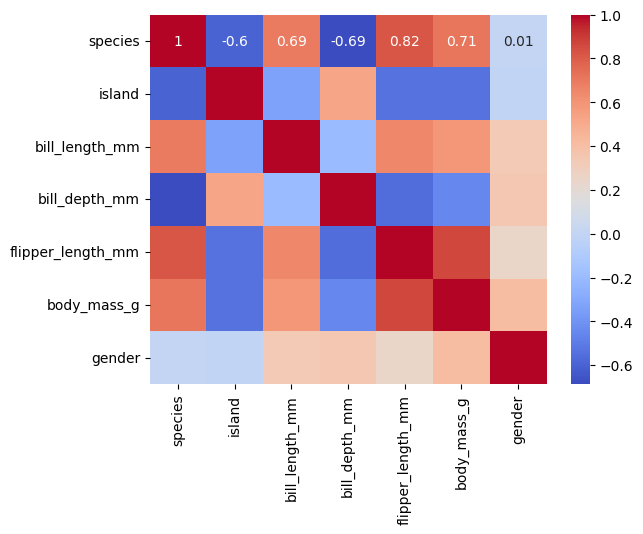

In [24]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Convert the string data to categorical data so that the data will be numbers

In [22]:
#Normalization
numeric_df_min = numeric_df.min()
numeric_df_max = numeric_df.max()
numeric_df = (df-numeric_df_min)/(numeric_df_max-numeric_df_min)
print(numeric_df)

df['bill_depth_mm']=numeric_df['bill_depth_mm']
df['bill_length_mm']=numeric_df['bill_length_mm']
df['body_mass_g']=numeric_df['body_mass_g']
#df['calorie requirement']=numeric_df['calorie requirement']  as this field is removed during 
df['flipper_length_mm']=numeric_df['flipper_length_mm']

print(df)

     bill_depth_mm  bill_length_mm  body_mass_g  flipper_length_mm  gender  \
0         0.666667        0.254545     0.291667           0.152542     NaN   
1         0.511905        0.269091     0.305556           0.237288     NaN   
2         0.583333        0.298182     0.152778           0.389831     NaN   
3         0.585514        0.487062     0.375000           0.436693     NaN   
4         0.738095        0.167273     0.208333           0.355932     NaN   
..             ...             ...          ...                ...     ...   
339       0.797619        0.861818     0.361111           0.593220     NaN   
340       0.595238        0.414545     0.194444           0.508475     NaN   
341       0.607143        0.636364     0.298611           0.355932     NaN   
342       0.702381        0.680000     0.388889           0.644068     NaN   
343       0.666667        0.658182     0.298611           0.440678     NaN   

     island  species  
0       NaN      NaN  
1       NaN      

calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         190.000000  3550.000000  2007.000000  
50%        17.300000         197.000000  4050.000000  2008.000000  
75%        18.700000         213.000000  4750.000000  2009.000000  
max       127.260000         231.000000  6300.000000  2009.000000  
 
For preprocessing we used 
mode imputaion for categorical data value_counts() and get the index0, 
mean imputation for numerical data
find_quartile for finding the interquartile range
corr() to find the correlation matrix
Categorical().codes for converting to c
egorical values
3.
#In visualization graphs we could have a prcise understanding on numeric data
Most of the penguins have bill length between 38 to 48 mm
Most of the penguins have bill depth between 15.5 to 18.5 mm
Most of the penguins have body mass between 3500 to 4700 g
Most of the penguind have flipper length duration between 190 to 215 mm

For categorical data
Adelie species has the highest calorie requirement
There are more male penguins than female
Most of the penguins live in Torgersion island

PART II - LOGISTIC REGRESSION
Target chosen - Gender (To predict : Male/Female)

In [23]:
df.to_csv('penguins_cleaned.csv',index=False)